### 简单线性回归

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.导入数据

In [6]:
points = np.genfromtxt("data.csv", delimiter=",")

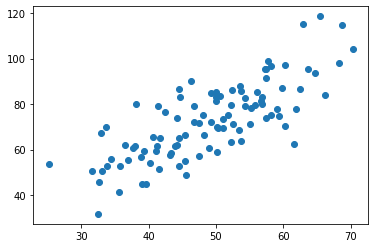

In [24]:
#行,列
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y)
plt.show()

 #### 2.定义损失函数

In [26]:
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points) 
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - w * x - b) ** 2
    return total_cost / M

#### 3.定义拟合函数

##### 3.1最小二乘法

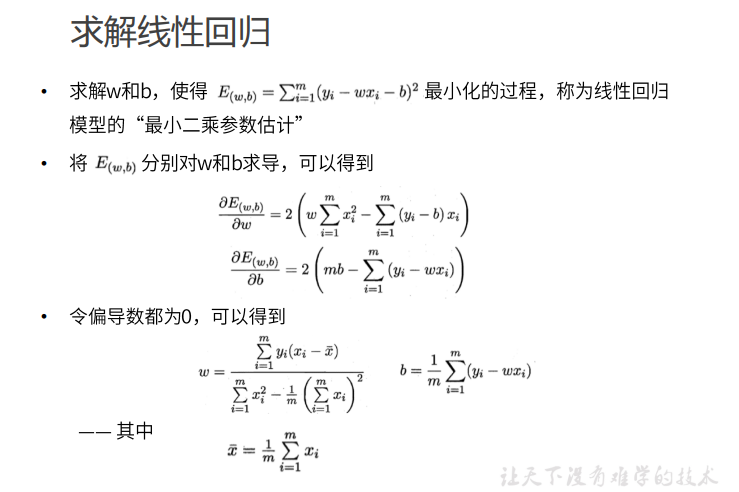

In [51]:
def average(data):
    sum = 0
    num = len(data)
    for i in range(num):
        sum += data[i]
    return sum / num

def fit(points):
    M = len(points)
    x_avg = average(points[:, 0])
    sum_yx = 0
    sum_x2 = 0
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_yx += y * (x - x_avg)
        sum_x2 += x ** 2
    w = sum_yx / (sum_x2 - M * (x_avg ** 2))
    
    sum_delta = 0
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_delta += (y - w * x)
    b = sum_delta / M
    return w, b

#测试
w, b = fit(points)
print("w is:", w)
print("b is:", b)
print("cost is:", compute_cost(w, b, points))

w is: 1.3224310227553846
b is: 7.991020982269173
cost is: 110.25738346621313


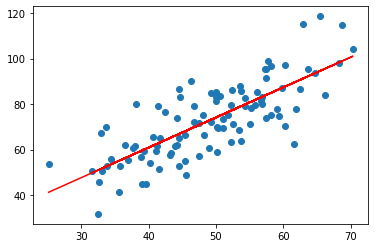

In [52]:
#画出拟合曲线
plt.scatter(x, y)
pred_y = w * x + b
plt.plot(x, pred_y, c='r')
plt.show()

##### 3.2使用梯度下降法

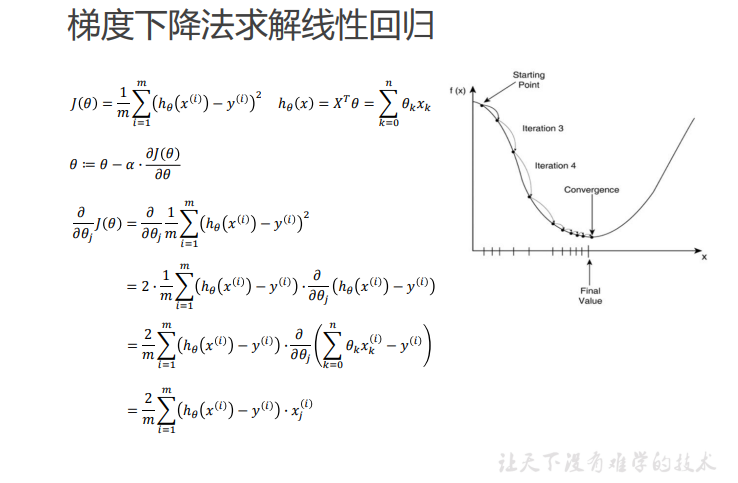

In [55]:
# 参数初始化
alpha = 0.0001 #学习率
initial_w = 0
initial_b = 0
num_iter = 10 #迭代次数

def grad_desc(points, initial_w, initial_b, alpha, num_iter):
    w = initial_w
    b = initial_b
    # 保存所有损失函数值
    cost_list = []
    for i in range(num_iter):
        cost_list.append(compute_cost(w, b, points))
        w, b = step_grad_desc(w, b, alpha, points)
    return [w, b, cost_list]

def step_grad_desc(current_w, current_b, alpha, points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    #对每个点，代入公式求和
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_w += (current_w * x + current_b - y) * x
        sum_grad_b += current_w * x + current_b - y
    
    grad_w = 2/M * sum_grad_w
    grad_b = 2/M * sum_grad_b
    
    updated_w = current_w - alpha * grad_w
    updated_b = current_b - alpha * grad_b
    
    return updated_w, updated_b

w is: 1.4774173755483797
b is: 0.02963934787473238
cost is: 112.65585181499748


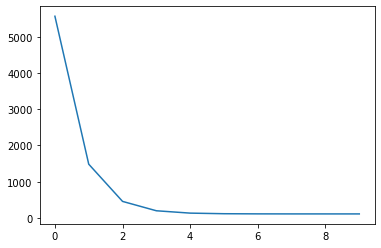

In [59]:
#测试
w, b, cost_list = grad_desc(points, initial_w, initial_b, alpha, num_iter)
print("w is:", w)
print("b is:", b)
print("cost is:", compute_cost(w, b, points))
plt.plot(cost_list)
plt.show()

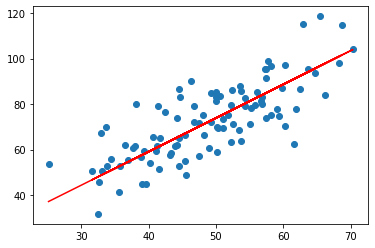

In [61]:
#画出拟合曲线
plt.scatter(x, y)
pred_y = w * x + b
plt.plot(x, pred_y, c='r')
plt.show()

##### 3.3使用写好的库

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [66]:
x_new = points[:, 0].reshape(-1, 1)
y_new = points[:, 1].reshape(-1, 1)

lr.fit(x_new, y_new)

LinearRegression()

In [69]:
w = lr.coef_
b = lr.intercept_
print("w is:", w)
print("b is:", b)
print("cost is:", compute_cost(w, b, points))

w is: [[1.32243102]]
b is: [7.99102098]
cost is: [[110.25738347]]
